In [89]:
import networkx as nx
from networkx.algorithms import community as com
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import powerlaw as pl
from collections import Counter
from operator import itemgetter

In [2]:
#%run StatisticalDataAnalysis.ipynb

In [3]:
#subDF = pd.DataFrame(data=subDict)

#with open("data/subredditsData", "wb+") as file:
#    pickle.dump(subDF, file)

In [4]:
#usersDF = pd.DataFrame(data=usersDict)

#with open("data/usersData", "wb+") as file:
#    pickle.dump(usersDF, file)

In [5]:
#submissionsDF = pd.DataFrame(data=submissionDict)

#with open("data/submissionsData", "wb+") as file:
#    pickle.dump(submissionsDF, file)

In [6]:
with open("data/subredditsData", 'rb') as file:
    subDF = pickle.load(file)

In [7]:
with open("data/usersData", 'rb') as file:
    usersDF = pickle.load(file)

In [8]:
with open("data/submissionsData", 'rb') as file:
    submissionsDF = pickle.load(file)

In [9]:
#for index in subDF:
#    subDF[index]['users'] = list(filter(lambda a: a != '[deleted]', subDF[index]['users']))

In [10]:
subreddits = set()
for _, item in subDF.iteritems():
    subreddits.add(item['subreddit'])

In [11]:
SNet = nx.Graph()
SNet.add_nodes_from(subreddits)

In [12]:
for _, item in usersDF.iteritems():
    if len(item['subreddit_ids']) > 1:
        for i in range(0, len(item['subreddit_ids']) - 1):
            for j in range(i + 1, len(item['subreddit_ids'])):
                if (subDF[item['subreddit_ids'][i]]['subreddit'], subDF[item['subreddit_ids'][j]]['subreddit']) in SNet.edges:
                    SNet.edges[subDF[item['subreddit_ids'][i]]['subreddit'], subDF[item['subreddit_ids'][j]]['subreddit']]['weight'] += 1
                else:
                    SNet.add_edge(subDF[item['subreddit_ids'][i]]['subreddit'], subDF[item['subreddit_ids'][j]]['subreddit'], weight=1)

In [13]:
#print(usersDF.iat[2, 1])

In [14]:
#for _, item in usersDF.iteritems():
#    print(item['subreddit_ids'])

In [15]:
outputPath = "models/SNet_count_aggregation.gml"

nx.write_gml(SNet, outputPath)

In [16]:
SNetTSubreddits = ['reddit.com', 'pics', 'worldnews', 'programming', 'business', 'politics', 'obama', 'science',
                   'technology', 'WTF', 'AskReddit', 'netsec', 'philosophy', 'videos', 'offbeat', 'funny', 'entertainment',
                   'linux', 'geek', 'gaming', 'comics', 'gadgets', 'nsfw', 'news', 'environment', 'atheism', 'canada',
                   'math', 'Economics', 'scifi', 'bestof', 'cogsci', 'joel', 'Health', 'guns', 'photography', 'software',
                   'history', 'ideas']

In [17]:
#for id, item in subDF.items():
#    print(item['subreddit'])

In [18]:
SNetT = nx.Graph()
SNetT.add_nodes_from(SNetTSubreddits)

In [19]:
for _, item in usersDF.iteritems():
    if len(item['subreddit_ids']) > 1:
        for i in range(0, len(item['subreddit_ids']) - 1):
            for j in range(i + 1, len(item['subreddit_ids'])):
                if subDF[item['subreddit_ids'][i]]['subreddit'] in SNetTSubreddits and subDF[item['subreddit_ids'][j]]['subreddit'] in SNetTSubreddits:
                    if (subDF[item['subreddit_ids'][i]]['subreddit'], subDF[item['subreddit_ids'][j]]['subreddit']) in SNetT.edges:
                        SNetT.edges[subDF[item['subreddit_ids'][i]]['subreddit'], subDF[item['subreddit_ids'][j]]['subreddit']]['weight'] += 1
                    else:
                        SNetT.add_edge(subDF[item['subreddit_ids'][i]]['subreddit'], subDF[item['subreddit_ids'][j]]['subreddit'], weight=1)

In [20]:
outputPath = "models/SNetT_count_aggregation.gml"

nx.write_gml(SNetT, outputPath)

In [26]:
SNetClean = SNet
weightToCut = 4

edgesToCut = list(edge[:2] for edge in list(filter(lambda edge: edge[2] < weightToCut, (e for e in SNetClean.edges.data('weight')))))
SNetClean.remove_edges_from(edgesToCut)

SNetClean.remove_nodes_from(list(nx.isolates(SNetClean)))

In [27]:
outputPath = "models/SNet_count_aggregation_clean.gml"

nx.write_gml(SNetClean, outputPath)

In [52]:
#print(nx.degree_centrality(SNet))
#print(nx.eigenvector_centrality(SNet))
#print(nx.closeness_centrality(SNet))
#print(nx.betweenness_centrality(SNet))
#print(nx.average_clustering(SNet))

('reddit.com', 0.9298440979955456)
('pics', 0.8351893095768373)
('politics', 0.8296213808463251)
('science', 0.809576837416481)
('technology', 0.809576837416481)
('funny', 0.8006681514476615)
('worldnews', 0.7951002227171492)
('WTF', 0.7761692650334076)
('entertainment', 0.7483296213808462)
('programming', 0.7483296213808462)


In [57]:
print("SNet\n")
print("\nTop10 by degree centrality:")
for elem in sorted(nx.degree_centrality(SNet).items(), key = lambda item: item[1], reverse=True)[:10]:
    print(str(elem[0]) + " - " + str(elem[1]))
print("\nTop10 by eigenvector centrality:")
for elem in sorted(nx.eigenvector_centrality(SNet).items(), key = lambda item: item[1], reverse=True)[:10]:
    print(str(elem[0]) + " - " + str(elem[1]))
print("\nTop10 by closeness centrality:")
for elem in sorted(nx.closeness_centrality(SNet).items(), key = lambda item: item[1], reverse=True)[:10]:
    print(str(elem[0]) + " - " + str(elem[1]))
print("\nTop10 by betweenness centrality:")
for elem in sorted(nx.betweenness_centrality(SNet).items(), key = lambda item: item[1], reverse=True)[:10]:
    print(str(elem[0]) + " - " + str(elem[1]))
print()
print(nx.average_clustering(SNet))

SNet


Top10 by degree centrality:
reddit.com - 0.9298440979955456
pics - 0.8351893095768373
politics - 0.8296213808463251
science - 0.809576837416481
technology - 0.809576837416481
funny - 0.8006681514476615
worldnews - 0.7951002227171492
WTF - 0.7761692650334076
entertainment - 0.7483296213808462
programming - 0.7483296213808462

Top10 by eigenvector centrality:
reddit.com - 0.09642333862900651
politics - 0.09578903179566962
pics - 0.09577867984820042
science - 0.09555061596590253
technology - 0.0955174025041317
funny - 0.09543619830622588
worldnews - 0.09525603994885815
WTF - 0.09479597060658125
entertainment - 0.09432638643713814
business - 0.09379940162405244

Top10 by closeness centrality:
reddit.com - 0.9331988041158501
pics - 0.8514328136599852
politics - 0.8378673424020472
technology - 0.8331821568900135
funny - 0.8270161464782464
science - 0.8247273564049672
worldnews - 0.8232085214944608
WTF - 0.8097866434266164
entertainment - 0.7925571403749863
programming - 0.792557140374

In [58]:
print("SNetT\n")
print("\nTop10 by degree centrality:")
for elem in sorted(nx.degree_centrality(SNetT).items(), key = lambda item: item[1], reverse=True)[:10]:
    print(str(elem[0]) + " - " + str(elem[1]))
print("\nTop10 by eigenvector centrality:")
for elem in sorted(nx.eigenvector_centrality(SNetT).items(), key = lambda item: item[1], reverse=True)[:10]:
    print(str(elem[0]) + " - " + str(elem[1]))
print("\nTop10 by closeness centrality:")
for elem in sorted(nx.closeness_centrality(SNetT).items(), key = lambda item: item[1], reverse=True)[:10]:
    print(str(elem[0]) + " - " + str(elem[1]))
print("\nTop10 by betweenness centrality:")
for elem in sorted(nx.betweenness_centrality(SNetT).items(), key = lambda item: item[1], reverse=True)[:10]:
    print(str(elem[0]) + " - " + str(elem[1]))
print()
print(nx.average_clustering(SNetT))

SNetT


Top10 by degree centrality:
reddit.com - 1.0
pics - 1.0
worldnews - 1.0
programming - 1.0
business - 1.0
politics - 1.0
obama - 1.0
science - 1.0
technology - 1.0
WTF - 1.0

Top10 by eigenvector centrality:
reddit.com - 0.16012815380508713
pics - 0.16012815380508713
worldnews - 0.16012815380508713
programming - 0.16012815380508713
business - 0.16012815380508713
politics - 0.16012815380508713
obama - 0.16012815380508713
science - 0.16012815380508713
technology - 0.16012815380508713
WTF - 0.16012815380508713

Top10 by closeness centrality:
reddit.com - 1.0
pics - 1.0
worldnews - 1.0
programming - 1.0
business - 1.0
politics - 1.0
obama - 1.0
science - 1.0
technology - 1.0
WTF - 1.0

Top10 by betweenness centrality:
reddit.com - 0.0
pics - 0.0
worldnews - 0.0
programming - 0.0
business - 0.0
politics - 0.0
obama - 0.0
science - 0.0
technology - 0.0
WTF - 0.0

1.0


In [59]:
print("SNetClean\n")
print("\nTop10 by degree centrality:")
for elem in sorted(nx.degree_centrality(SNetClean).items(), key = lambda item: item[1], reverse=True)[:10]:
    print(str(elem[0]) + " - " + str(elem[1]))
print("\nTop10 by eigenvector centrality:")
for elem in sorted(nx.eigenvector_centrality(SNetClean).items(), key = lambda item: item[1], reverse=True)[:10]:
    print(str(elem[0]) + " - " + str(elem[1]))
print("\nTop10 by closeness centrality:")
for elem in sorted(nx.closeness_centrality(SNetClean).items(), key = lambda item: item[1], reverse=True)[:10]:
    print(str(elem[0]) + " - " + str(elem[1]))
print("\nTop10 by betweenness centrality:")
for elem in sorted(nx.betweenness_centrality(SNetClean).items(), key = lambda item: item[1], reverse=True)[:10]:
    print(str(elem[0]) + " - " + str(elem[1]))
print()
print(nx.average_clustering(SNetClean))

SNetClean


Top10 by degree centrality:
reddit.com - 0.9298440979955456
pics - 0.8351893095768373
politics - 0.8296213808463251
science - 0.809576837416481
technology - 0.809576837416481
funny - 0.8006681514476615
worldnews - 0.7951002227171492
WTF - 0.7761692650334076
entertainment - 0.7483296213808462
programming - 0.7483296213808462

Top10 by eigenvector centrality:
reddit.com - 0.09642333862900651
politics - 0.09578903179566962
pics - 0.09577867984820042
science - 0.09555061596590253
technology - 0.0955174025041317
funny - 0.09543619830622588
worldnews - 0.09525603994885815
WTF - 0.09479597060658125
entertainment - 0.09432638643713814
business - 0.09379940162405244

Top10 by closeness centrality:
reddit.com - 0.9331988041158501
pics - 0.8514328136599852
politics - 0.8378673424020472
technology - 0.8331821568900135
funny - 0.8270161464782464
science - 0.8247273564049672
worldnews - 0.8232085214944608
WTF - 0.8097866434266164
entertainment - 0.7925571403749863
programming - 0.7925571

In [86]:
print("\n*** SNet greedy modularity communities:")
for c in com.greedy_modularity_communities(SNet):
    print()
    print(len(c))
    print(c)

print("\n*** SNet Girvan-Newman communities:")
for t in tuple(sorted(c) for c in next(com.girvan_newman(SNet))):
    print()
    print(len(t))
    print(t)

print("\n*** SNet label propagation communities:")
for l in com.label_propagation_communities(SNet):
    print()
    print(len(l))
    print(l)


*** SNet greedy modularity communities:

629
frozenset({'justwow', 'funny', 'tf2', 'dickoftheyear', 'ru', 'offensive', 'trippy', 'dostuff', 'goodoldays', 'wackynews', 'WikiDashboard', 'onlinejournalism', 'philadelphia', 'security', 'NonAustrianEconomics', 'agile', 'Gothic', 'FixedGearBicycle', 'gaming', 'InternetMarketing', '2008is1929', 'pcgaming', 'actlocally', 'worldnews', 'cuilsucks', 'artofpickup', 'datacompression', 'BagLovers', 'rails', 'jobpostings', 'nachos', 'ko', 'sport', 'GlobalistNews', 'bitch_n_complain', 'spanishlanguagenerds', 'germany', 'dvd', 'ireland', 'economics2', 'penis', 'hacks', 'haiku', 'CARTOON', 'Economics', 'cycling', 'China', 'ResistTyranny', 'featurerequest', 'impoliteconversation', 'test', 'cocoa', 'neopagan', 'Bondage', 'onlinegames', 'visualization', 'Tcl', 'seduction', 'celebrity', 'UpperCanada', 'Magic', 'nederlands', 'KiNov', 'prowrestling', 'Omorashi', 'MusicVideos', 'nl', 'FantasticContraption', 'dotnet', 'tedtalks', 'bollywood', 'Autos', 'pics', 


893
['2008Olympics', '2008is1929', '2600', '4chan', '5edwin', '911truth', 'ANTISHARIA', 'ASPNET', 'AdultChildren', 'Africa', 'Amateur', 'Ambientalmente', 'AmericanEconomy', 'AmericanGovernment', 'AmericanHistory', 'AmericanPolitics', 'Anarchism', 'Android', 'AnimalRights', 'Animals', 'AnnikRubens', 'Annoying', 'Anthropology', 'AntiHillary', 'Apocalypse', 'Archaeology', 'Art', 'ArtCrit', 'AsesoresInversiones', 'AskReddit', 'Astronomy', 'Atlanta', 'Attenborough', 'Austin', 'Autos', 'BCCResearch', 'BSD', 'Bacon', 'Badass', 'BagLovers', 'Baroque', 'Basketball', 'BestGamesEver', 'BlackOps', 'Blogging', 'BluesMusic', 'Bondage', 'Boobies', 'Breakfast', 'Brooklyn', 'Buddhism', 'CARTOON', 'C_Programming', 'California', 'CanadaVotes2008', 'Capitalism', 'Cappuccino', 'Catholicism', 'Celtic', 'Charitable', 'Charity', 'Cheese', 'ChileRemix', 'China', 'Chinese', 'Christianity', 'Cleveland', 'Clojure', 'Coffee', 'Colorado', 'CommonLaw', 'ComputerSecurity', 'Conservative', 'Conserve', 'Cooking', 'Cpl

In [87]:
print("\n*** SNetT greedy modularity communities:")
for c in com.greedy_modularity_communities(SNetT):
    print()
    print(len(c))
    print(c)

print("\n*** SNetT Girvan-Newman communities:")
for t in tuple(sorted(c) for c in next(com.girvan_newman(SNetT))):
    print()
    print(len(t))
    print(t)

print("\n*** SNetT label propagation communities:")
for l in com.label_propagation_communities(SNetT):
    print()
    print(len(l))
    print(l)


*** SNetT greedy modularity communities:

39
frozenset({'Economics', 'funny', 'guns', 'linux', 'reddit.com', 'ideas', 'photography', 'Health', 'videos', 'entertainment', 'politics', 'science', 'gadgets', 'comics', 'atheism', 'environment', 'news', 'gaming', 'netsec', 'software', 'offbeat', 'bestof', 'philosophy', 'WTF', 'worldnews', 'math', 'technology', 'scifi', 'history', 'nsfw', 'canada', 'business', 'pics', 'obama', 'AskReddit', 'joel', 'cogsci', 'programming', 'geek'})

*** SNetT Girvan-Newman communities:

1
['reddit.com']

38
['AskReddit', 'Economics', 'Health', 'WTF', 'atheism', 'bestof', 'business', 'canada', 'cogsci', 'comics', 'entertainment', 'environment', 'funny', 'gadgets', 'gaming', 'geek', 'guns', 'history', 'ideas', 'joel', 'linux', 'math', 'netsec', 'news', 'nsfw', 'obama', 'offbeat', 'philosophy', 'photography', 'pics', 'politics', 'programming', 'science', 'scifi', 'software', 'technology', 'videos', 'worldnews']

*** SNetT label propagation communities:

39
{'Eco

In [88]:
print("\n*** SNetClean greedy modularity communities:")
for c in com.greedy_modularity_communities(SNetClean):
    print()
    print(len(c))
    print(c)

print("\n*** SNetClean Girvan-Newman communities:")
for t in tuple(sorted(c) for c in next(com.girvan_newman(SNetClean))):
    print()
    print(len(t))
    print(t)

print("\n*** SNetClean label propagation communities:")
for l in com.label_propagation_communities(SNetClean):
    print()
    print(len(l))
    print(l)


*** SNetClean greedy modularity communities:

629
frozenset({'justwow', 'funny', 'tf2', 'dickoftheyear', 'ru', 'offensive', 'trippy', 'dostuff', 'goodoldays', 'wackynews', 'WikiDashboard', 'onlinejournalism', 'philadelphia', 'security', 'NonAustrianEconomics', 'agile', 'Gothic', 'FixedGearBicycle', 'gaming', 'InternetMarketing', '2008is1929', 'pcgaming', 'actlocally', 'worldnews', 'cuilsucks', 'artofpickup', 'datacompression', 'BagLovers', 'rails', 'jobpostings', 'nachos', 'ko', 'sport', 'GlobalistNews', 'bitch_n_complain', 'spanishlanguagenerds', 'germany', 'dvd', 'ireland', 'economics2', 'penis', 'hacks', 'haiku', 'CARTOON', 'Economics', 'cycling', 'China', 'ResistTyranny', 'featurerequest', 'impoliteconversation', 'test', 'cocoa', 'neopagan', 'Bondage', 'onlinegames', 'visualization', 'Tcl', 'seduction', 'celebrity', 'UpperCanada', 'Magic', 'nederlands', 'KiNov', 'prowrestling', 'Omorashi', 'MusicVideos', 'nl', 'FantasticContraption', 'dotnet', 'tedtalks', 'bollywood', 'Autos', 'pi


893
['2008Olympics', '2008is1929', '2600', '4chan', '5edwin', '911truth', 'ANTISHARIA', 'ASPNET', 'AdultChildren', 'Africa', 'Amateur', 'Ambientalmente', 'AmericanEconomy', 'AmericanGovernment', 'AmericanHistory', 'AmericanPolitics', 'Anarchism', 'Android', 'AnimalRights', 'Animals', 'AnnikRubens', 'Annoying', 'Anthropology', 'AntiHillary', 'Apocalypse', 'Archaeology', 'Art', 'ArtCrit', 'AsesoresInversiones', 'AskReddit', 'Astronomy', 'Atlanta', 'Attenborough', 'Austin', 'Autos', 'BCCResearch', 'BSD', 'Bacon', 'Badass', 'BagLovers', 'Baroque', 'Basketball', 'BestGamesEver', 'BlackOps', 'Blogging', 'BluesMusic', 'Bondage', 'Boobies', 'Breakfast', 'Brooklyn', 'Buddhism', 'CARTOON', 'C_Programming', 'California', 'CanadaVotes2008', 'Capitalism', 'Cappuccino', 'Catholicism', 'Celtic', 'Charitable', 'Charity', 'Cheese', 'ChileRemix', 'China', 'Chinese', 'Christianity', 'Cleveland', 'Clojure', 'Coffee', 'Colorado', 'CommonLaw', 'ComputerSecurity', 'Conservative', 'Conserve', 'Cooking', 'Cpl

In [91]:
def plotDegFrequency(graph, weighted = False, xscale = "log", yscale = "log"):
    if weighted:
        degrees = graph.degree(weight = "weight")
    else:
        degrees = graph.degree()
    
    _, degList = zip(*degrees)
    degCounts = Counter(degList)
    x, y = zip(*degCounts.items())
    
    plt.figure(1)
    
    if weighted:
        plt.xlabel("weighted degree")
    else:
        plt.xlabel("degree")
    plt.xscale(xscale)
    plt.xlim(1, max(x))
    
    plt.ylabel("frequency")
    plt.yscale(yscale)
    plt.ylim(1, max(y))
    
    plt.scatter(x, y, marker = ".")
    plt.show()

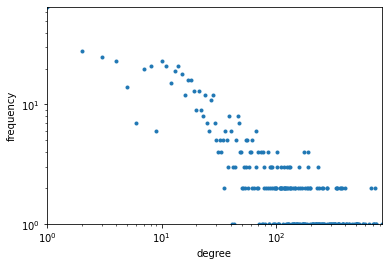

In [92]:
plotDegFrequency(SNet)

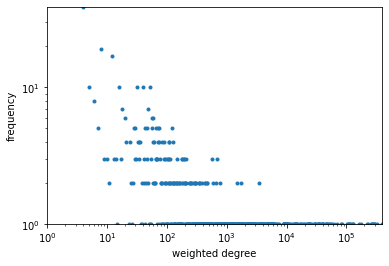

In [93]:
plotDegFrequency(SNet, weighted = True)

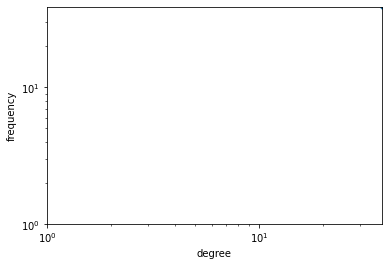

In [94]:
plotDegFrequency(SNetT)

C:\Users\rzlat\AppData\Local\Temp\ipykernel_8408\1800936658.py:22: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(1, max(y))


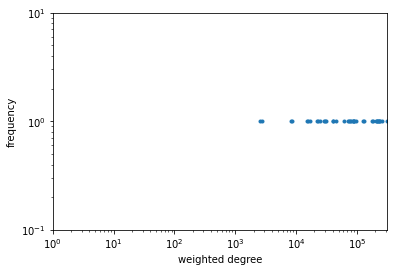

In [95]:
plotDegFrequency(SNetT, weighted = True)

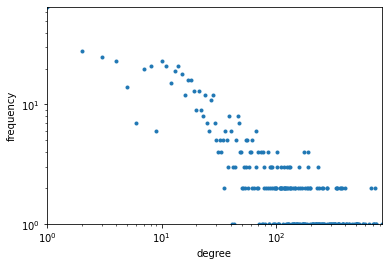

In [96]:
plotDegFrequency(SNetClean)

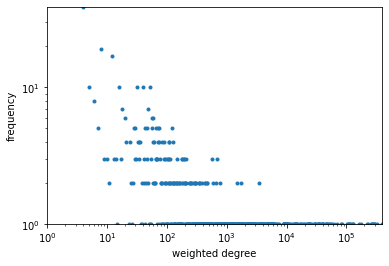

In [97]:
plotDegFrequency(SNetClean, weighted = True)

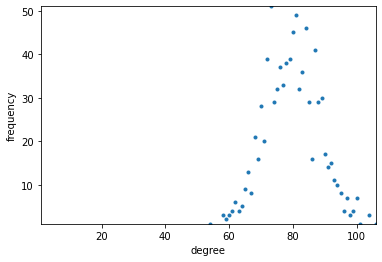

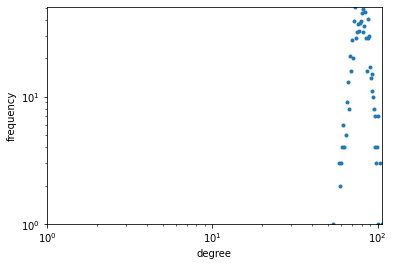

In [98]:
# Random network with size of SNet
n = SNet.number_of_nodes()
m = SNet.number_of_edges()

Gnm = nx.gnm_random_graph(n, m)

plotDegFrequency(Gnm, xscale = "linear", yscale = "linear")
plotDegFrequency(Gnm, xscale = "log", yscale = "log")

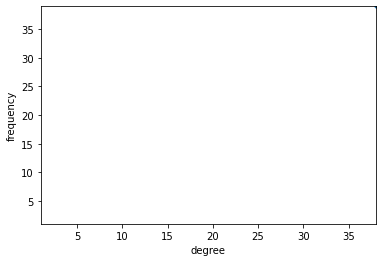

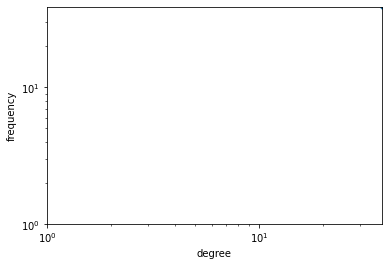

In [99]:
# Random network with size of SNetT
n = SNetT.number_of_nodes()
m = SNetT.number_of_edges()

Gnm = nx.gnm_random_graph(n, m)

plotDegFrequency(Gnm, xscale = "linear", yscale = "linear")
plotDegFrequency(Gnm, xscale = "log", yscale = "log")

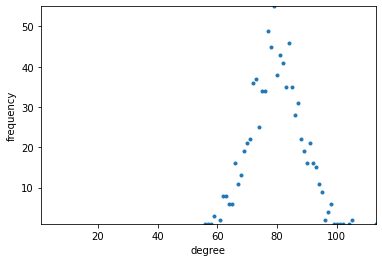

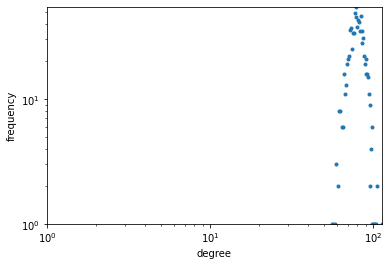

In [100]:
# Random network with size of SNetClean
n = SNetClean.number_of_nodes()
m = SNetClean.number_of_edges()

Gnm = nx.gnm_random_graph(n, m)

plotDegFrequency(Gnm, xscale = "linear", yscale = "linear")
plotDegFrequency(Gnm, xscale = "log", yscale = "log")

Max number of edges: 0.0887325932550644
Difference in number of nodes is -69, which is change of 0.19264595024708936%


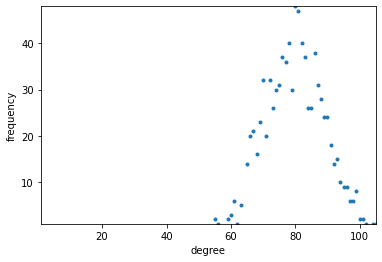

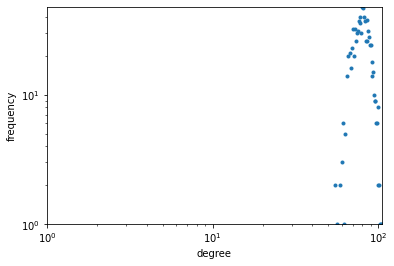

In [101]:
# Erdos-Renyi network for SNet
n = SNet.number_of_nodes()
m = SNet.number_of_edges()
p = (2 * float(m)) / (n * (n - 1))
print("Max number of edges: " + str(p))

ER = nx.erdos_renyi_graph(n, p)

deltaM = m - ER.number_of_edges()
print(f"Difference in number of nodes is {deltaM}, which is change of {abs(float(deltaM)) * 100 / m}%")

plotDegFrequency(ER, xscale = "linear", yscale = "linear")
plotDegFrequency(ER, xscale = "log", yscale = "log")

Max number of edges: 1.0
Difference in number of nodes is 0, which is change of 0.0%


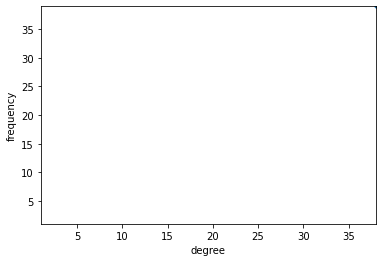

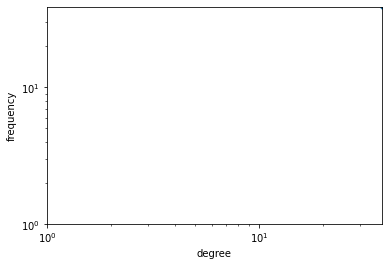

In [102]:
# Erdos-Renyi network for SNetT
n = SNetT.number_of_nodes()
m = SNetT.number_of_edges()
p = (2 * float(m)) / (n * (n - 1))
print("Max number of edges: " + str(p))

ER = nx.erdos_renyi_graph(n, p)

deltaM = m - ER.number_of_edges()
print(f"Difference in number of nodes is {deltaM}, which is change of {abs(float(deltaM)) * 100 / m}%")

plotDegFrequency(ER, xscale = "linear", yscale = "linear")
plotDegFrequency(ER, xscale = "log", yscale = "log")

Max number of edges: 0.0887325932550644
Difference in number of nodes is 28, which is change of 0.07817516821621018%


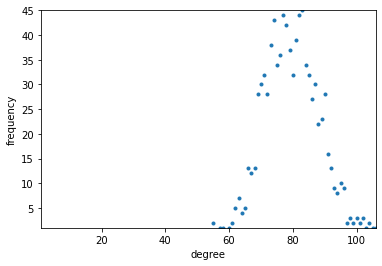

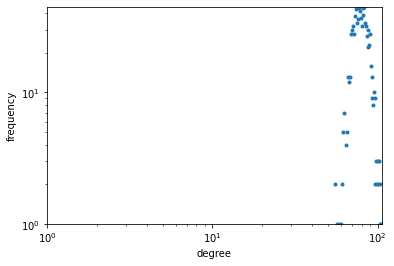

In [103]:
# Erdos-Renyi network for SNetClean
n = SNetClean.number_of_nodes()
m = SNetClean.number_of_edges()
p = (2 * float(m)) / (n * (n - 1))
print("Max number of edges: " + str(p))

ER = nx.erdos_renyi_graph(n, p)

deltaM = m - ER.number_of_edges()
print(f"Difference in number of nodes is {deltaM}, which is change of {abs(float(deltaM)) * 100 / m}%")

plotDegFrequency(ER, xscale = "linear", yscale = "linear")
plotDegFrequency(ER, xscale = "log", yscale = "log")

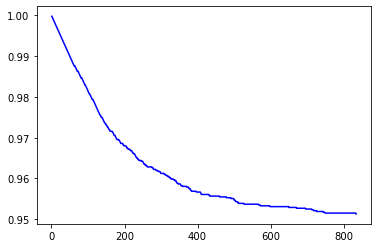

Calculating best minimal value for power law fit
3.7753962436316573
309.0
0.3613258144986748
Loglikelihood ratio: -2.3395251901702485
Exponential better than power law
Statistical significance: 0.10338597721221364
Loglikelihood ratio: -2.181778122686975
Truncated PL better than power law
Statistical significance: 0.036715582901760024


Assuming nested distributions


In [115]:
# Power Law for SNet
degreeSequence = sorted([d for n, d in SNet.degree()], reverse = True)
degreeCount = Counter(degreeSequence)
deg, cnt = zip(*degreeCount.items())

maxDeg = max(deg)

values, base = np.histogram(deg, bins = maxDeg)

cumulative = np.cumsum(values)

plt.plot(base[:-1], [float(x) / len(subreddits) for x in len(subreddits) - cumulative], c = "blue")

plt.show()

results = pl.Fit(degreeSequence)

#print(results.supported_distributions)

print(results.power_law.alpha)
print(results.power_law.xmin)
print(results.power_law.sigma)
R, p = results.distribution_compare("power_law", "exponential")
print(f"Loglikelihood ratio: {R}")
print("Exponential better than power law" if R < 0 else "Power law better than exponential")
print(f"Statistical significance: {p}")
R, p = results.distribution_compare("power_law", "truncated_power_law")
print(f"Loglikelihood ratio: {R}")
print("Truncated PL better than power law" if R < 0 else "Power law better than truncated PL")
print(f"Statistical significance: {p}")

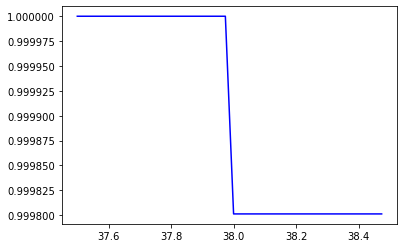

Calculating best minimal value for power law fit
nan
nan
nan
Loglikelihood ratio: 0
Power law better than exponential
Statistical significance: 1
Loglikelihood ratio: 0
Power law better than truncated PL
Statistical significance: 1


Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
D:\Anaconda\lib\site-packages\powerlaw.py:1151: RuntimeWarning: invalid value encountered in double_scalars
  self.alpha = 1 + (self.n / sum(log(data/self.xmin)))
D:\Anaconda\lib\site-packages\powerlaw.py:1170: RuntimeWarning: invalid value encountered in double_scalars
  return 1 + len(data)/sum(log(data / (self.xmin)))
Not enough data. Returning nan
Not enough data. Returning nan
C:\Users\rzlat\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\rzlat\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
No valid fits found.
Not enough data. Returning nan
Assuming nested distributions
D:\Anaconda\lib\site-packages\powerlaw.py:1383: RuntimeWarning: invalid v

In [116]:
# Power Law for SNetT
degreeSequence = sorted([d for n, d in SNetT.degree()], reverse = True)
degreeCount = Counter(degreeSequence)
deg, cnt = zip(*degreeCount.items())

maxDeg = max(deg)

values, base = np.histogram(deg, bins = maxDeg)

cumulative = np.cumsum(values)

plt.plot(base[:-1], [float(x) / len(subreddits) for x in len(subreddits) - cumulative], c = "blue")

plt.show()

results = pl.Fit(degreeSequence)

#print(results.supported_distributions)

print(results.power_law.alpha)
print(results.power_law.xmin)
print(results.power_law.sigma)
R, p = results.distribution_compare("power_law", "exponential")
print(f"Loglikelihood ratio: {R}")
print("Exponential better than power law" if R < 0 else "Power law better than exponential")
print(f"Statistical significance: {p}")
R, p = results.distribution_compare("power_law", "truncated_power_law")
print(f"Loglikelihood ratio: {R}")
print("Truncated PL better than power law" if R < 0 else "Power law better than truncated PL")
print(f"Statistical significance: {p}")

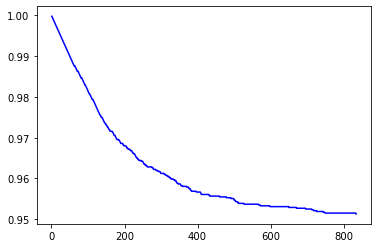

Calculating best minimal value for power law fit
3.7753962436316573
309.0
0.3613258144986748
Loglikelihood ratio: -2.3395251901702485
Exponential better than power law
Statistical significance: 0.10338597721221364
Loglikelihood ratio: -2.181778122686975
Truncated PL better than power law
Statistical significance: 0.036715582901760024


Assuming nested distributions


In [117]:
# Power Law for SNetClean
degreeSequence = sorted([d for n, d in SNetClean.degree()], reverse = True)
degreeCount = Counter(degreeSequence)
deg, cnt = zip(*degreeCount.items())

maxDeg = max(deg)

values, base = np.histogram(deg, bins = maxDeg)

cumulative = np.cumsum(values)

plt.plot(base[:-1], [float(x) / len(subreddits) for x in len(subreddits) - cumulative], c = "blue")

plt.show()

results = pl.Fit(degreeSequence)

#print(results.supported_distributions)

print(results.power_law.alpha)
print(results.power_law.xmin)
print(results.power_law.sigma)
R, p = results.distribution_compare("power_law", "exponential")
print(f"Loglikelihood ratio: {R}")
print("Exponential better than power law" if R < 0 else "Power law better than exponential")
print(f"Statistical significance: {p}")
R, p = results.distribution_compare("power_law", "truncated_power_law")
print(f"Loglikelihood ratio: {R}")
print("Truncated PL better than power law" if R < 0 else "Power law better than truncated PL")
print(f"Statistical significance: {p}")

In [122]:
# Assortativity for SNet
r1 = nx.degree_assortativity_coefficient(SNet)
r2 = nx.degree_assortativity_coefficient(SNet, weight = "weight")

print(r1)
print(r2)
print("Non-similar" if r1 < 0 else "Similar")

-0.586591489163198
-0.007596196763209419
Non-similar


In [123]:
# Assortativity for SNetT
r1 = nx.degree_assortativity_coefficient(SNetT)
r2 = nx.degree_assortativity_coefficient(SNetT, weight = "weight")

print(r1)
print(r2)
print("Non-similar" if r1 < 0 else "Similar")

nan
0.00010159530135191904
Similar


In [124]:
# Assortativity for SNetT
r1 = nx.degree_assortativity_coefficient(SNetClean)
r2 = nx.degree_assortativity_coefficient(SNetClean, weight = "weight")

print(r1)
print(r2)
print("Non-similar" if r1 < 0 else "Similar")

-0.586591489163198
-0.007596196763209419
Non-similar


In [126]:
# Clustering coefficient for SNet
subreddit, clusteringCoef = zip(*nx.clustering(SNet, weight = "weight").items())

nonzero = [(sub, cc) for sub, cc in zip(subreddit, clusteringCoef) if cc > 0]

df = pd.DataFrame(nonzero, columns = ["id", "cc"])
df.sort_values("cc", inplace = True)

maxLocalClusteringCoef = max(clusteringCoef)
avgClusteringCoef = nx.average_clustering(SNet)

print(f"Max local cc: {maxLocalClusteringCoef}")
print(f"Average cc: {avgClusteringCoef}")
print("Local clustering coefficients that are nonzero: ")
print(df)

Max local cc: 0.0033243695810638973
Average cc: 0.8449317408549903
Local clustering coefficients that are nonzero: 
               id        cc
531        arabic  0.000038
584         Infos  0.000089
420    ChileRemix  0.000150
191      dior_lei  0.000184
371  Kaede_Rukawa  0.000218
..            ...       ...
93     geospatial  0.002687
308         hacks  0.002783
720  philadelphia  0.003035
333            sv  0.003125
220    formulaone  0.003324

[831 rows x 2 columns]


In [127]:
# Clustering coefficient for SNetT
subreddit, clusteringCoef = zip(*nx.clustering(SNetT, weight = "weight").items())

nonzero = [(sub, cc) for sub, cc in zip(subreddit, clusteringCoef) if cc > 0]

df = pd.DataFrame(nonzero, columns = ["id", "cc"])
df.sort_values("cc", inplace = True)

maxLocalClusteringCoef = max(clusteringCoef)
avgClusteringCoef = nx.average_clustering(SNet)

print(f"Max local cc: {maxLocalClusteringCoef}")
print(f"Average cc: {avgClusteringCoef}")
print("Local clustering coefficients that are nonzero: ")
print(df)

Max local cc: 0.14465726073078275
Average cc: 0.8449317408549903
Local clustering coefficients that are nonzero: 
               id        cc
32           joel  0.006683
38          ideas  0.006698
34           guns  0.014702
36       software  0.014724
35    photography  0.021563
26         canada  0.021892
37        history  0.023549
11         netsec  0.027870
27           math  0.028541
12     philosophy  0.030092
31         cogsci  0.032778
33         Health  0.034204
29          scifi  0.034427
23           news  0.040697
17          linux  0.041054
30         bestof  0.044059
6           obama  0.052194
18           geek  0.059540
24    environment  0.060554
21        gadgets  0.061357
13         videos  0.062750
22           nsfw  0.065021
28      Economics  0.065415
20         comics  0.068128
10      AskReddit  0.068848
25        atheism  0.071358
19         gaming  0.083993
14        offbeat  0.086100
4        business  0.102201
3     programming  0.103866
16  entertainment 

In [129]:
# Clustering coefficient for SNetClean
subreddit, clusteringCoef = zip(*nx.clustering(SNetClean, weight = "weight").items())

nonzero = [(sub, cc) for sub, cc in zip(subreddit, clusteringCoef) if cc > 0]

df = pd.DataFrame(nonzero, columns = ["id", "cc"])
df.sort_values("cc", inplace = True)

maxLocalClusteringCoef = max(clusteringCoef)
avgClusteringCoef = nx.average_clustering(SNet)

print(f"Max local cc: {maxLocalClusteringCoef}")
print(f"Average cc: {avgClusteringCoef}")
print("Local clustering coefficients that are nonzero: ")
print(df)

Max local cc: 0.0033243695810638973
Average cc: 0.8449317408549903
Local clustering coefficients that are nonzero: 
               id        cc
531        arabic  0.000038
584         Infos  0.000089
420    ChileRemix  0.000150
191      dior_lei  0.000184
371  Kaede_Rukawa  0.000218
..            ...       ...
93     geospatial  0.002687
308         hacks  0.002783
720  philadelphia  0.003035
333            sv  0.003125
220    formulaone  0.003324

[831 rows x 2 columns]
